<a href="https://colab.research.google.com/github/MinhDat13/Bai_tap_AI/blob/main/W6_Dieu_Khien_DC_va_AC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8f57b9bb356529aea98e80461293dd2297b3fd1c44b197c2caeffcf38d03e965
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

set_point = ctrl.Antecedent(np.arange(18,28,1),'set_point')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')

set_point['low'] = fuzz.trimf(set_point.universe,[18,18,21])
set_point['average'] = fuzz.trimf(set_point.universe,[20,23,25])
set_point['high'] = fuzz.trimf(set_point.universe,[23,27,27])

val_sensor['low'] = fuzz.trimf(val_sensor.universe,[0,10,20])
val_sensor['average'] = fuzz.trimf(val_sensor.universe,[10,20,30])
val_sensor['high'] = fuzz.trimf(val_sensor.universe,[20,30,40])

pwm['vlow'] = fuzz.trimf(pwm.universe,[0,0,130])
pwm['low'] = fuzz.trimf(pwm.universe,[0,0,195])
pwm['average'] = fuzz.trimf(pwm.universe,[65,195,255])
pwm['high'] = fuzz.trimf(pwm.universe,[195,255,255])

#set_point.view()
#val_sensor.view()
pwm.view()

rule1 = ctrl.Rule(set_point['low'] & val_sensor['low'], pwm['vlow'])
rule2 = ctrl.Rule(set_point['low'] & val_sensor['average'], pwm['average'])
rule3 = ctrl.Rule(set_point['low'] & val_sensor['high'], pwm['high'])
rule4 = ctrl.Rule(set_point['average'] & val_sensor['low'], pwm['low'])
rule5 = ctrl.Rule(set_point['average'] & val_sensor['average'], pwm['average'])
rule6 = ctrl.Rule(set_point['average'] & val_sensor['high'], pwm['low'])
rule7 = ctrl.Rule(set_point['high'] & val_sensor['low'], pwm['high'])
rule8 = ctrl.Rule(set_point['high'] & val_sensor['average'], pwm['average'])
rule9 = ctrl.Rule(set_point['high'] & val_sensor['high'], pwm['vlow'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['set_point'] = 26
tipping.input['val_sensor'] = 20
tipping.compute()
print(tipping.output['pwm'])
pwm.view(sim=tipping)


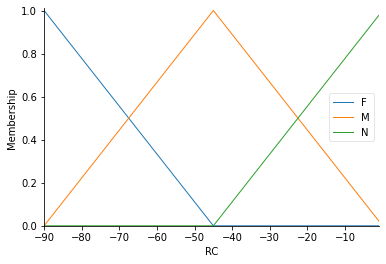

In [28]:
from networkx.algorithms.flow.utils import Level
# ĐIỀU KHIỂN MOBILE ROBOT

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

L = ctrl.Antecedent(np.arange(0,151,1),'L')
C = ctrl.Antecedent(np.arange(0,151,1),'C')
R = ctrl.Antecedent(np.arange(0,151,1),'R')
LC = ctrl.Consequent(np.arange(0,90,1),'LC')
RC = ctrl.Consequent(np.arange(-90,0,1),'RC')
pwm1 = ctrl.Consequent(np.arange(0,256,1),'pwm1')
pwm2 = ctrl.Consequent(np.arange(0,256,1),'pwm2')


L['N'] = fuzz.trimf(L.universe,[0,0,75])
L['M'] = fuzz.trimf(L.universe,[0,75,150])
L['F'] = fuzz.trimf(L.universe,[75,150,150])

C['N'] = fuzz.trimf(C.universe,[0,0,75])
C['M'] = fuzz.trimf(C.universe,[0,75,150])
C['F'] = fuzz.trimf(C.universe,[75,150,150])

R['N'] = fuzz.trimf(R.universe,[0,0,75])
R['M'] = fuzz.trimf(R.universe,[0,75,150])
R['F'] = fuzz.trimf(R.universe,[75,150,150])

LC['S'] = fuzz.trimf(LC.universe,[0,0,45])
LC['N'] = fuzz.trimf(LC.universe,[0,45,90])
LC['B'] = fuzz.trimf(LC.universe,[45,90,90])

RC['B'] = fuzz.trimf(RC.universe,[-90,-90,-45])
RC['N'] = fuzz.trimf(RC.universe,[-90,-45,0])
RC['S'] = fuzz.trimf(RC.universe,[-45,0,0])

pwm1['vlow'] = fuzz.trimf(pwm.universe,[0,0,130])
pwm1['low'] = fuzz.trimf(pwm.universe,[0,0,195])
pwm1['average'] = fuzz.trimf(pwm.universe,[65,195,255])
pwm1['high'] = fuzz.trimf(pwm.universe,[195,255,255])

pwm2['vlow'] = fuzz.trimf(pwm.universe,[0,0,130])
pwm2['low'] = fuzz.trimf(pwm.universe,[0,0,195])
pwm2['average'] = fuzz.trimf(pwm.universe,[65,195,255])
pwm2['high'] = fuzz.trimf(pwm.universe,[195,255,255])

RC.view()

rule1 = ctrl.Rule(L['N']&C['N'],LC['S'])
rule2 = ctrl.Rule(L['N']&C['M'],LC['N'])
rule3 = ctrl.Rule(L['N']&C['F'],LC['B'])
rule4 = ctrl.Rule(L['M']&C['N'],LC['S'])
rule5 = ctrl.Rule(L['M']&C['M'],LC['N'])
rule6 = ctrl.Rule(L['M']&C['F'],LC['N'])
rule7 = ctrl.Rule(L['F']&C['N'],LC['S'])
rule8 = ctrl.Rule(L['F']&C['M'],LC['N'])
rule9 = ctrl.Rule(L['F']&C['F'],LC['N'])

rule10 = ctrl.Rule(R['N']&C['N'],RC['B'])
rule11 = ctrl.Rule(R['N']&C['M'],RC['N'])
rule12 = ctrl.Rule(R['N']&C['F'],RC['S'])
rule13 = ctrl.Rule(R['M']&C['N'],RC['B'])
rule14 = ctrl.Rule(R['M']&C['M'],RC['N'])
rule15 = ctrl.Rule(R['M']&C['F'],RC['N'])
rule16 = ctrl.Rule(R['F']&C['N'],RC['B'])
rule17 = ctrl.Rule(R['F']&C['M'],RC['N'])
rule18 = ctrl.Rule(R['F']&C['F'],RC['N'])

rule19 = ctrl.Rule(LC['S']&RC['S'],[pwm1['vlow'],pwm2['high']])
rule20 = ctrl.Rule(LC['S']&RC['N'],[pwm1['average'],pwm2['low']])
rule21 = ctrl.Rule(LC['S']&RC['B'],[pwm1['high'],pwm2['vlow']])
rule22 = ctrl.Rule(LC['N']&RC['S'],[pwm1['vlow'],pwm2['high']])
rule23 = ctrl.Rule(LC['N']&RC['N'],[pwm1['vlow'],pwm2['vlow']])
rule24 = ctrl.Rule(LC['N']&RC['B'],[pwm1['average'],pwm2['low']])
rule25 = ctrl.Rule(LC['B']&RC['S'],[pwm1['vlow'],pwm2['high']])
rule26 = ctrl.Rule(LC['B']&RC['N'],[pwm1['low'],pwm2['average']])
rule27 = ctrl.Rule(LC['B']&RC['B'],[pwm1['high'],pwm2['high']])